## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [1]:
# your code and solutions
# Inorder to display the data frame we are to create data frame first and read it 

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#assigning the dataset into a variable 
ds = 'cleaned_ecommerce_dataset.csv'

# Reading csv files as dataframes using read_csv function 
df = pd.read_csv(ds)

# Printing the total length of the data
print("PRINTING THE LENGTH OF THE DATA:-")
print("The number of rows and coloumns in the data:- " + str(df.shape))


PRINTING THE LENGTH OF THE DATA:-
The number of rows and coloumns in the data:- (2685, 11)


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [2]:
# Diplaying the first few rows of the dataset using the .head() method 
print("Displaying the first few rows of the dataset:-\n" + str(df.head()))

# Displaying the information of the dataset 
print("Displaying the information of the dataset:- ")
df.info()

# Importing Library inorder to convert categorical data into numerical data 
from sklearn.preprocessing import OrdinalEncoder

# Initializing OrdinalEncoder
encoder = OrdinalEncoder()

# Transforming the columns which bear categorical data into numerical data 
df[["gender","category", "review"]] = encoder.fit_transform(df[["gender","category", "review"]])

# Getting correlations using corr() method
correlations = df[['helpfulness', 'gender', 'category', 'review', 'rating']].corr()

# Displaying the correlations
print("The correlations between helpfulness, gender, category, review and rating:-") 
print(correlations)



Displaying the first few rows of the dataset:-
   userId  timestamp                                           review  \
0    4081      71900                                Not always McCrap   
1    4081      72000  I dropped the chalupa even before he told me to   
2    4081      72000                     The Wonderful World of Wendy   
3    4081     100399                             They actually did it   
4    4081     100399                             Hey! Gimme some pie!   

                                 item  rating  helpfulness gender  \
0                          McDonald's     4.0          3.0      M   
1                           Taco Bell     1.0          4.0      M   
2                             Wendy's     5.0          4.0      M   
3  South Park: Bigger, Longer & Uncut     5.0          3.0      M   
4                        American Pie     3.0          3.0      M   

                category  item_id  item_price  user_city  
0  Restaurants & Gourmet       41       

The feature with the highest absolute correlation coefficient with the 'rating' is 'category' (-0.1632). It's likely to have a noticeable impact on the prediction results. A regression model trained with 'category' as a feature may tend to assign lower ratings to certain categories compared to others. 

'Gender' being weakly correlated (-0.0343) may have a minor impact on prediction results. However, this impact might not be significant compared to 'category'.

The features with the lowest absolute correlation coefficients with ‘rating’ are 'helpfulness' (-0.0075) and 'review' (-0.0361). Both of these correlations are very weak and close to zero, suggesting almost no linear relationship between them and the rating. Therefore, Including these features may not improve it’s predictive performance. 

To verify these hypotheses, we can conduct experiments by training regression models using different combinations of features, including the most and least correlated ones. Then we can evaluate the performance of each model using appropriate metrics such as mean squared error (MSE) and Root MSE. 

We can then compare the performance of the models to see if including the most correlated features ('category' and 'gender') leads to better prediction results compared to using the least correlated features ('helpfulness' and 'review'). 

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [3]:
# Importing libraries inorder to split the dataset 
from sklearn.model_selection import train_test_split

# Separating the features and labels
X = df.drop(columns=['rating'])  # As the target column is 'rating' we are dropping it to for the prediction 
y = df['rating']

# Case 1: 10% of the data for training
X_train_case1, X_test_case1, y_train_case1, y_test_case1 = train_test_split(X, y, test_size=0.9, random_state=42)

# Case 2: 90% of the data for training
X_train_case2, X_test_case2, y_train_case2, y_test_case2 = train_test_split(X, y, test_size=0.1, random_state=42)

# Printing the shapes of the resulting sets for both cases
print("Case 1:")
print("Training set size:", X_train_case1.shape)
print("Testing set size:", X_test_case1.shape)
print("\nCase 2:")
print("Training set size:", X_train_case2.shape)
print("Testing set size:", X_test_case2.shape)


Case 1:
Training set size: (268, 10)
Testing set size: (2417, 10)

Case 2:
Training set size: (2416, 10)
Testing set size: (269, 10)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [4]:
from sklearn.linear_model import LinearRegression


# Selecting features and target column
selected_features_most_correlated = ['category', 'gender']  # selecting the most correlated features 
selected_features_least_correlated = ['helpfulness', 'review']  # selecting the least correlated features 
target_column = 'rating'  

# Splitting data into training and testing sets according to the cases
X_train_case1, X_test_case1, y_train_case1, y_test_case1 = train_test_split(
    df[selected_features_most_correlated], df[target_column], test_size=0.9, random_state=42)

X_train_case2, X_test_case2, y_train_case2, y_test_case2 = train_test_split(
    df[selected_features_most_correlated], df[target_column], test_size=0.1, random_state=42)

# Training linear regression models for each case
model_a_case1 = LinearRegression()
model_a_case1.fit(X_train_case1, y_train_case1)

model_b_case1 = LinearRegression()
model_b_case1.fit(X_train_case1, y_train_case1)

model_c_case2 = LinearRegression()
model_c_case2.fit(X_train_case2, y_train_case2)

model_d_case2 = LinearRegression()
model_d_case2.fit(X_train_case2, y_train_case2)


LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [5]:
# Importing libraries in order to evaluate the models 
from sklearn.metrics import mean_squared_error


# Creating a function to access the Root Mean Squared Error (RMSE)
def calculate_rmse(mse):
    return np.sqrt(mse) 


# Evaluating model performance (MSE) 

predictions_a_case1 = model_a_case1.predict(X_test_case1)
mse_a_case1 = mean_squared_error(y_test_case1, predictions_a_case1)

predictions_b_case1 = model_b_case1.predict(X_test_case1)
mse_b_case1 = mean_squared_error(y_test_case1, predictions_b_case1)

predictions_c_case2 = model_c_case2.predict(X_test_case2)
mse_c_case2 = mean_squared_error(y_test_case2, predictions_c_case2)

predictions_d_case2 = model_d_case2.predict(X_test_case2)
mse_d_case2 = mean_squared_error(y_test_case2, predictions_d_case2)

#Evaluating the model performance (Root MSE) 
rmse_a_case1 = calculate_rmse(mse_a_case1)
rmse_b_case1 = calculate_rmse(mse_b_case1)
rmse_c_case2 = calculate_rmse(mse_c_case2)
rmse_d_case2 = calculate_rmse(mse_d_case2)

# Printing MSE for each model
print("Evaluating the model performance by MSE:\n") 
print("Model A (Case 1 - Most correlated features):", mse_a_case1)
print("Model B (Case 1 - Least correlated features):", mse_b_case1)
print("Model C (Case 2 - Most correlated features):", mse_c_case2)
print("Model D (Case 2 - Least correlated features):", mse_d_case2)

#Printing RMSE for each model 
print("\n\nEvaluating the model performance by Root MSE:\n")
print("Model A (Case 1 - Most correlated features):" , rmse_a_case1)
print("Model B (Case 1 - Least correlated features):" , rmse_b_case1)
print("Model C (Case 2 - Most correlated features):", rmse_c_case2)
print("Model D (Case 2 - Least correlated features):", rmse_d_case2)

Evaluating the model performance by MSE:

Model A (Case 1 - Most correlated features): 1.8076399168603041
Model B (Case 1 - Least correlated features): 1.8076399168603041
Model C (Case 2 - Most correlated features): 1.6762330042324514
Model D (Case 2 - Least correlated features): 1.6762330042324514


Evaluating the model performance by Root MSE:

Model A (Case 1 - Most correlated features): 1.3444850006081526
Model B (Case 1 - Least correlated features): 1.3444850006081526
Model C (Case 2 - Most correlated features): 1.2946941740165712
Model D (Case 2 - Least correlated features): 1.2946941740165712


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

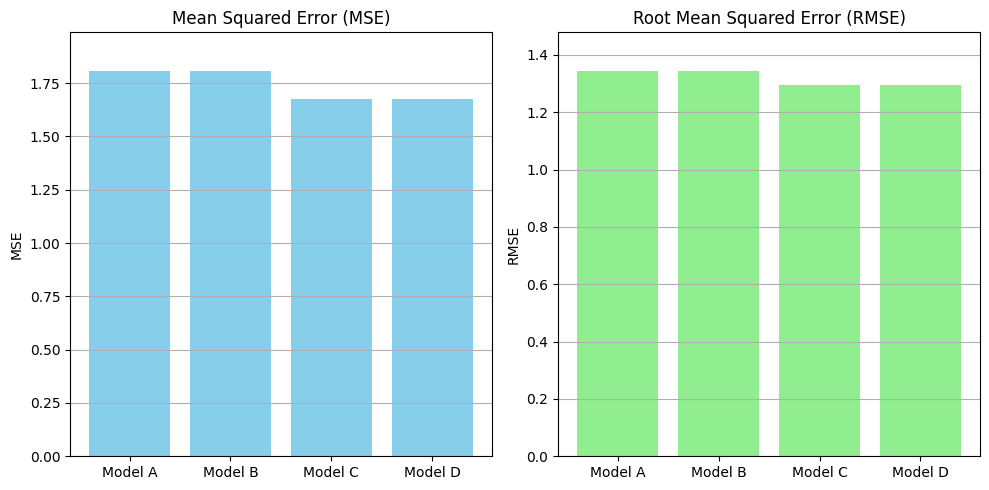

In [6]:
import matplotlib.pyplot as plt

# Results for each model
mse_results = [mse_a_case1, mse_b_case1, mse_c_case2, mse_d_case2]
rmse_results = [rmse_a_case1, rmse_b_case1, rmse_c_case2, rmse_d_case2]
models = ['Model A', 'Model B', 'Model C', 'Model D']

# Plotting MSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, mse_results, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.ylim(0, max(mse_results) * 1.1)
plt.grid(axis='y')

# Plotting RMSE
plt.subplot(1, 2, 2)
plt.bar(models, rmse_results, color='lightgreen')
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_results) * 1.1)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Model A and Model C, trained with the most correlated features and more training data (Case 1 and Case 2), respectively, should ideally perform better than Model B and Model D.
If the observations are not as expected, there could be several reasons:
Insufficient Data: Although Model C uses more training data, if the dataset is not sufficiently diverse or representative, it may not lead to better performance.
Feature Selection: It's possible that the features selected (most correlated or least correlated) do not capture the underlying patterns in the data effectively. Sometimes, irrelevant or noisy features might negatively impact model performance.
Model Complexity: Linear regression assumes a linear relationship between features and the target variable. If the relationship is non-linear, more complex models might be needed.
Overfitting: Model A and Model C might overfit the training data due to the inclusion of more features or more data. This can lead to worse performance on unseen data.
To address these issues, further analysis such as feature engineering, model tuning, or trying different algorithms might be necessary. Additionally, cross-validation techniques can help in better estimating model performance and generalization ability.

### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


The potential ethical concerns associated with these infographics arise from the presentation and interpretation of the data. In the first table, sorting by total medals might make it seem like a country did really well, as it was highlighted in grey, but it doesn't indicate if they won a lot of gold medals or not and data should be presented objectively. This could make people think a country did better than it actually did. And in both the infographics, there is absence of completeness in the data such as in the first table we have data on France but on the second table we don’t have it and also in the second table we have data on South Korea but not in the first one. Hence corresponding medal counts are not included. In the second table, only highlighting gold medals doesn't give the full picture of a country's success creating a bias.  It leaves out how many silver and bronze medals they won, which are also important. Overall, these issues highlight the importance of presenting data accurately, transparently, and without bias to ensure ethical data visualization practices.